In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from termcolor import colored
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [2]:
%store -r X
%store -r Y
%store -r X_train
%store -r Y_train
%store -r X_test
%store -r Y_test
%store -r X_train_iqr
%store -r X_test_iqr

In [3]:
def report(model, X, Y, text = "training"):
    Y_pred = model.predict(X)
    
    print("Classification report for model {} on {} data".format(type(model).__name__, text))
    print("---------------------------------------------------------------------------------")
    print(classification_report(Y, Y_pred))
    print("---------------------------------------------------------------------------------")
    print(f'Confusion matrix for {text} set:')
    print(pd.DataFrame(confusion_matrix(Y, Y_pred), columns=['N', 'P'], index=['N', 'P']))

In [4]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train_iqr = scaler.transform(X_train_iqr)
X_test_iqr = scaler.transform(X_test_iqr)

In [5]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [6]:
report(knn, X_train, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.76      0.75     15005
           1       0.75      0.72      0.73     14728

    accuracy                           0.74     29733
   macro avg       0.74      0.74      0.74     29733
weighted avg       0.74      0.74      0.74     29733

---------------------------------------------------------------------------------
Confusion matrix for training set:
       N      P
N  11443   3562
P   4184  10544


In [7]:
report(knn, X_test, Y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.63      0.62      5077
           1       0.60      0.57      0.58      4834

    accuracy                           0.60      9911
   macro avg       0.60      0.60      0.60      9911
weighted avg       0.60      0.60      0.60      9911

---------------------------------------------------------------------------------
Confusion matrix for test set:
      N     P
N  3194  1883
P  2059  2775


In [8]:
params = {'n_neighbors': range(5, 41, 5),
          'weights': ['uniform'],
          'p': [1, 2]
         }

In [9]:
estimator = GridSearchCV(KNeighborsClassifier(), params, cv = 4, verbose = 4)

In [10]:
estimator.fit(X_train, Y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV 1/4] END n_neighbors=5, p=1, weights=uniform;, score=0.606 total time=  12.0s
[CV 2/4] END n_neighbors=5, p=1, weights=uniform;, score=0.595 total time=   8.9s
[CV 3/4] END n_neighbors=5, p=1, weights=uniform;, score=0.600 total time=   8.6s
[CV 4/4] END n_neighbors=5, p=1, weights=uniform;, score=0.605 total time=   8.5s
[CV 1/4] END n_neighbors=5, p=2, weights=uniform;, score=0.597 total time=   1.6s
[CV 2/4] END n_neighbors=5, p=2, weights=uniform;, score=0.597 total time=   1.4s
[CV 3/4] END n_neighbors=5, p=2, weights=uniform;, score=0.593 total time=   1.7s
[CV 4/4] END n_neighbors=5, p=2, weights=uniform;, score=0.602 total time=   1.8s
[CV 1/4] END n_neighbors=10, p=1, weights=uniform;, score=0.610 total time=   9.0s
[CV 2/4] END n_neighbors=10, p=1, weights=uniform;, score=0.602 total time=   8.4s
[CV 3/4] END n_neighbors=10, p=1, weights=uniform;, score=0.614 total time=   8.5s
[CV 4/4] END n_neighbors=10, p=1, 

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 41, 5), 'p': [1, 2],
                         'weights': ['uniform']},
             verbose=4)

In [11]:
estimator.best_params_

{'n_neighbors': 35, 'p': 1, 'weights': 'uniform'}

In [12]:
estimator.best_score_

0.631991440818944

In [13]:
report(estimator.best_estimator_, X_train, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.71      0.68     15005
           1       0.67      0.61      0.64     14728

    accuracy                           0.66     29733
   macro avg       0.66      0.66      0.66     29733
weighted avg       0.66      0.66      0.66     29733

---------------------------------------------------------------------------------
Confusion matrix for training set:
       N     P
N  10625  4380
P   5719  9009


In [14]:
report(estimator.best_estimator_, X_test, Y_test, 'test')

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.68      0.66      5077
           1       0.64      0.59      0.61      4834

    accuracy                           0.64      9911
   macro avg       0.64      0.63      0.63      9911
weighted avg       0.64      0.64      0.63      9911

---------------------------------------------------------------------------------
Confusion matrix for test set:
      N     P
N  3447  1630
P  1982  2852


In [15]:
knn.fit(X_train_iqr, Y_train)

KNeighborsClassifier()

In [16]:
report(knn, X_train_iqr, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.76      0.74     15005
           1       0.74      0.72      0.73     14728

    accuracy                           0.74     29733
   macro avg       0.74      0.74      0.74     29733
weighted avg       0.74      0.74      0.74     29733

---------------------------------------------------------------------------------
Confusion matrix for training set:
       N      P
N  11330   3675
P   4139  10589


In [17]:
report(knn, X_test_iqr, Y_test, 'test')

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.62      0.61      5077
           1       0.59      0.57      0.58      4834

    accuracy                           0.59      9911
   macro avg       0.59      0.59      0.59      9911
weighted avg       0.59      0.59      0.59      9911

---------------------------------------------------------------------------------
Confusion matrix for test set:
      N     P
N  3144  1933
P  2083  2751


In [18]:
estimator2 = GridSearchCV(KNeighborsClassifier(), params, cv = 4, verbose = 4)
estimator2.fit(X_train_iqr, Y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV 1/4] END n_neighbors=5, p=1, weights=uniform;, score=0.606 total time=   3.2s
[CV 2/4] END n_neighbors=5, p=1, weights=uniform;, score=0.597 total time=   3.2s
[CV 3/4] END n_neighbors=5, p=1, weights=uniform;, score=0.601 total time=   3.2s
[CV 4/4] END n_neighbors=5, p=1, weights=uniform;, score=0.604 total time=   3.2s
[CV 1/4] END n_neighbors=5, p=2, weights=uniform;, score=0.600 total time=   0.5s
[CV 2/4] END n_neighbors=5, p=2, weights=uniform;, score=0.600 total time=   0.5s
[CV 3/4] END n_neighbors=5, p=2, weights=uniform;, score=0.599 total time=   0.5s
[CV 4/4] END n_neighbors=5, p=2, weights=uniform;, score=0.595 total time=   0.5s
[CV 1/4] END n_neighbors=10, p=1, weights=uniform;, score=0.614 total time=   3.4s
[CV 2/4] END n_neighbors=10, p=1, weights=uniform;, score=0.609 total time=   3.4s
[CV 3/4] END n_neighbors=10, p=1, weights=uniform;, score=0.613 total time=   3.4s
[CV 4/4] END n_neighbors=10, p=1, 

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 41, 5), 'p': [1, 2],
                         'weights': ['uniform']},
             verbose=4)

In [19]:
report(estimator2.best_estimator_, X_train_iqr, Y_train)
report(estimator2.best_estimator_, X_test_iqr, Y_test, 'test')

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.72      0.68     15005
           1       0.67      0.59      0.63     14728

    accuracy                           0.66     29733
   macro avg       0.66      0.66      0.65     29733
weighted avg       0.66      0.66      0.66     29733

---------------------------------------------------------------------------------
Confusion matrix for training set:
       N     P
N  10762  4243
P   5973  8755
Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      5077
           1       0.64      0.57      0.60      4834

    accuracy                           0.63    

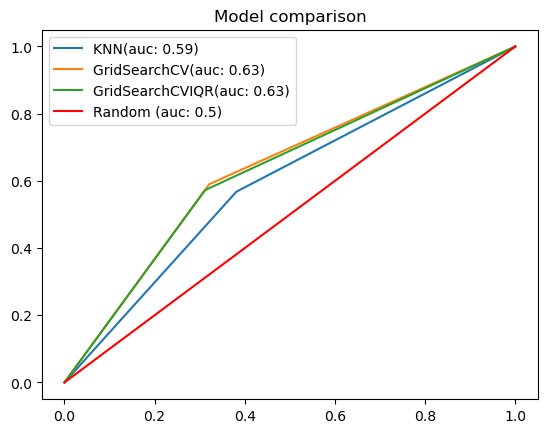

In [20]:
models = [knn, estimator.best_estimator_, estimator2.best_estimator_]
model_names = ['KNN', 'GridSearchCV', 'GridSearchCVIQR']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Model comparison")
plt.legend()
plt.show()

In [21]:
%store knn
knn_grid = estimator.best_estimator_
%store knn_grid
knn_grid_iqr = estimator2.best_estimator_
%store knn_grid_iqr

Stored 'knn' (KNeighborsClassifier)
Stored 'knn_grid' (KNeighborsClassifier)
Stored 'knn_grid_iqr' (KNeighborsClassifier)
